In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
masks = "D:\\projects\\lyft_challenge\\Train\\CameraSeg\\*.png"
rgb = "D:\\projects\\lyft_challenge\\Train\\CameraRGB\\*.png"
import glob
mask_files = glob.glob(masks)
rgb_files = glob.glob(rgb)
rgb_files.sort()
mask_files.sort()
print("found %d masks" % len(mask_files))
print("found %d rgb" % len(rgb_files))

found 1000 masks
found 1000 rgb


In [3]:
opt = {}

opt['class_colors'] = [
        ([0, 0, 0]), #sky
        ([1, 0, 0]), #buildings
        ([2, 0, 0]), #?
        ([3, 0, 0]), #?
        ([4, 0, 0]), #?
        ([5, 0, 0]), #?
        ([6, 0, 0]), #lane lines
        ([7, 0, 0]), #street
        ([8, 0, 0]), #sidewalk
        ([9, 0, 0]), #trees
        ([10, 0, 0]), #car
        ([11, 0, 0]), #walls
        ([255, 0, 0]), #nothing
    ]

opt['combined_classes'] =\
{
    1 : [(0, 5), (8, 9), (11, 12)],
    2 : [(6, 7)],
    3 : [(10, 10)]
}
    
    

D:\projects\lyft_challenge\Train\CameraRGB\265.png


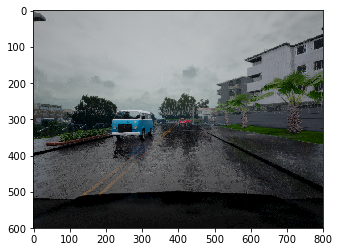

In [4]:
iFile = 185
print(rgb_files[iFile])

img = cv2.imread(rgb_files[iFile])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

D:\projects\lyft_challenge\Train\CameraSeg\265.png


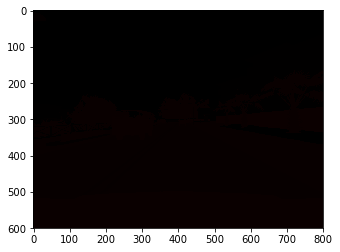

(600, 800, 3)


In [7]:
mask_filename = mask_files[iFile]
print(mask_filename)
mimg = cv2.imread(mask_filename)
mimg = cv2.cvtColor(mimg, cv2.COLOR_BGR2RGB)
plt.imshow(mimg)
plt.show()
print(mimg.shape)

w 800 h 600
selecting range [0 0 0] [5 0 0] for class 1
selecting range [8 0 0] [9 0 0] for class 1
selecting range [11  0  0] [255   0   0] for class 1
selecting range [6 0 0] [7 0 0] for class 2
selecting range [10  0  0] [10  0  0] for class 3
(600, 800, 3)
3 masks


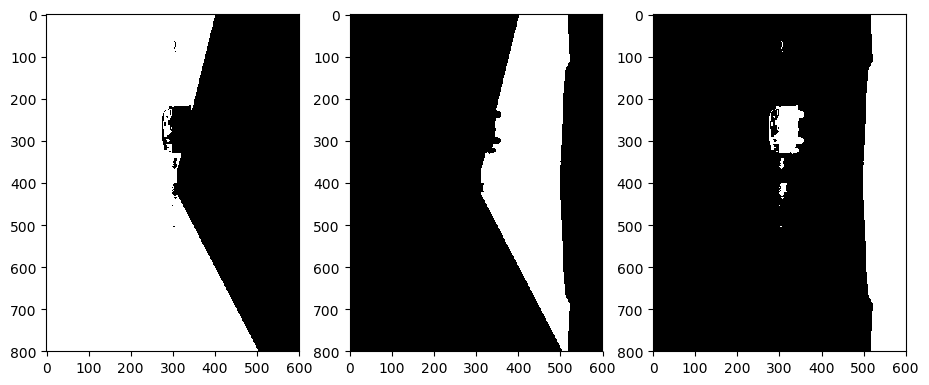

In [10]:
def prepare_mask(mimg, opt):
    '''
    Take an RGB image where different classes of pixels all share a color
    from the list of class_colors. Then create a matrix with a mask for each
    class using the threshold value passed in. Returns the numpy array of masks.
    Note*
    It only seemed to match the densenet_fc output shape when it was transposed.
    '''
    mask_channels = []
    comb_classes = opt['combined_classes']
    class_colors = opt['class_colors']
    
    width = mimg.shape[1]
    height = mimg.shape[0]
    print('w', width, 'h', height)
    mask_image = np.zeros([height, width, 3], dtype=np.dtype('B'))
    iClass = 0
    for key, value in comb_classes.items():
        mask_ch = None

        for col_indx_low, col_indx_hi in value:
            col_low = class_colors[col_indx_low]
            col_hi = class_colors[col_indx_hi]
            lower = np.array(col_low)
            upper = np.array(col_hi)
            print('selecting range', lower, upper, 'for class', key)
            mask = cv2.inRange(mimg, lower, upper)

            if mask_ch is None:
                mask_ch = np.zeros_like(mask)
                mask_ch[mask > 0] = 1
            else:
                mask_ch_add = np.zeros_like(mask)
                mask_ch_add[mask > 0] = 1
                mask_ch = np.add(mask_ch, mask_ch_add)
                
        mask_image[..., iClass] = np.reshape(mask_ch, (height, width))
        iClass += 1        

    print(mask_image.shape)
    return mask_image

mask = prepare_mask(mimg, opt).transpose()
print('%d masks' % len(mask))
plt.rcdefaults()
fig = plt.figure(figsize=(15,20))

nb_ch = len(opt['combined_classes'])
n = 1
for channal_mask in mask:
    plt.subplot(nb_ch,4, n)
    plt.imshow(channal_mask,cmap='gray')
    n += 1
plt.show()
